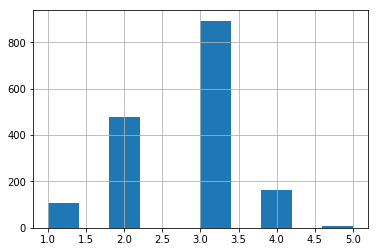

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv("ml-100k/u1.base", delimiter='\t', names=r_cols)
r_data = data.groupby('movie_id')['rating'].mean()
round_r_data = r_data.astype(int)
round_r_data.hist()

In [6]:
mean_counts = {}

for k in round_r_data:
    mean_counts[k] = mean_counts.get(k, 0) + 1
mean_counts

{3: 893, 4: 163, 2: 479, 1: 107, 5: 8}

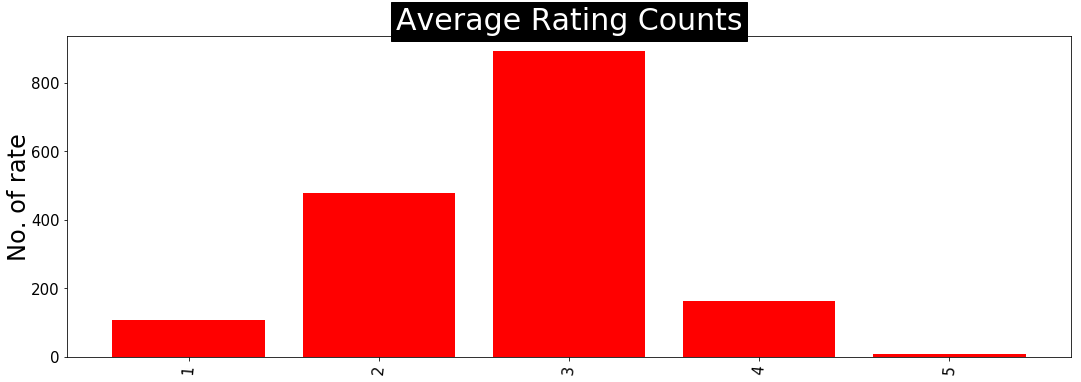

In [7]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(mean_counts.values())
x_axis = list(mean_counts.keys())
x_label = list(mean_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

In [10]:
r_data = r_data.sort_values(ascending=False)
r_data.head(3)  # TODO: get the movie title

movie_id
1500    5.0
1201    5.0
1293    5.0
Name: rating, dtype: float64

In [11]:
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
data_u = pd.read_csv('ml-100k/u.user', delimiter='|', names=u_cols)
users_ratings = data.merge(data_u, on='user_id', how='inner')
ur_data = users_ratings.groupby(['movie_id', 'gender'])['rating'].mean()
round_ur_data = ur_data.astype(int)
round_ur_data

movie_id  gender
1         F         3
          M         3
2         F         3
          M         3
3         F         2
          M         3
4         F         3
          M         3
5         F         3
          M         3
6         F         3
          M         3
7         F         3
          M         3
8         F         4
          M         3
9         F         3
          M         3
10        F         3
          M         3
11        F         3
          M         3
12        F         4
          M         4
13        F         3
          M         3
14        F         3
          M         3
15        F         3
          M         3
                   ..
1656      M         5
1657      M         3
1658      F         2
          M         4
1659      M         1
1660      M         2
1661      F         1
1662      F         4
          M         1
1663      F         2
1664      F         2
          M         4
1665      F         2
1666      F    

In [12]:
male_rating_counts = {}
female_rating_counts = {}
for k in round_ur_data.items():
    if k[0][1] == 'M':
        male_rating_counts[k[1]] = male_rating_counts.get(k[1], 0) + 1
    if k[0][1] == 'F':
        female_rating_counts[k[1]] = female_rating_counts.get(k[1], 0) + 1
male_rating_counts

{3: 800, 4: 213, 2: 442, 1: 87, 5: 13}

In [13]:
female_rating_counts

{3: 815, 2: 361, 4: 190, 1: 126, 5: 14}

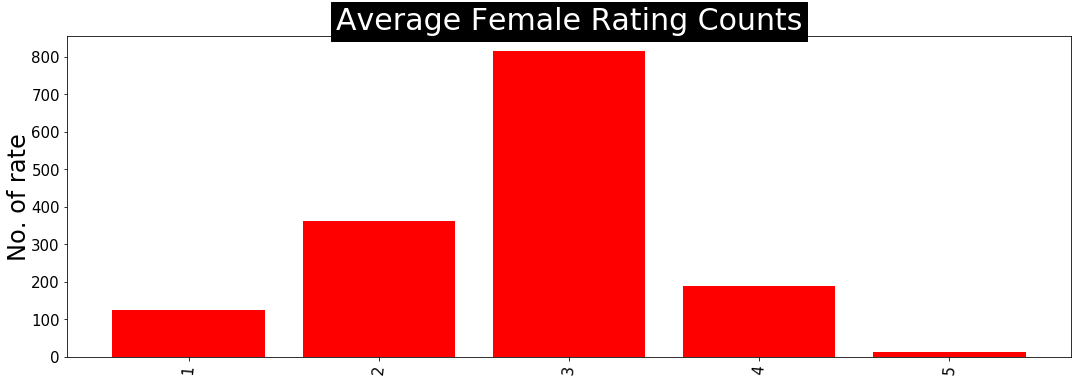

In [14]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(female_rating_counts.values())
x_axis = list(female_rating_counts.keys())
x_label = list(female_rating_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Female Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

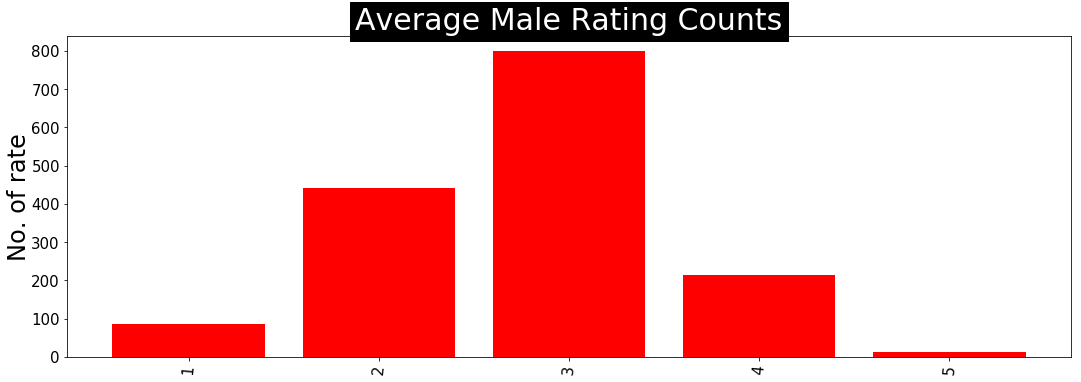

In [15]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(male_rating_counts.values())
x_axis = list(male_rating_counts.keys())
x_label = list(male_rating_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Male Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

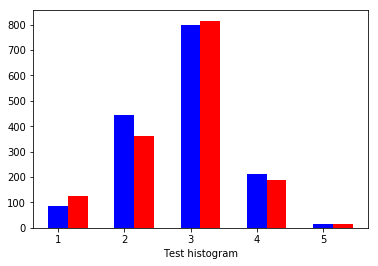

In [16]:
import numpy as np
sorted_keys = sorted(male_rating_counts.keys())
males_values = [male_rating_counts[k] for k in sorted_keys]
females_values = [female_rating_counts[k] for k in sorted_keys]
indices = np.arange(1, len(sorted_keys)+1)
width = 0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices,males_values,width,color='b',label='-Ymin')
ax.bar(indices+width,females_values,width,color='r',label='Ymax')
ax.set_xlabel('Test histogram')
plt.show()

In [18]:
ur_data

movie_id  gender
1         F         3.800000
          M         3.925795
2         F         3.200000
          M         3.177778
3         F         2.538462
          M         3.096774
4         F         3.315789
          M         3.586466
5         F         3.882353
          M         3.115385
6         F         3.500000
          M         3.375000
7         F         3.593750
          M         3.851852
8         F         4.018519
          M         3.983193
9         F         3.840580
          M         3.830508
10        F         3.733333
          M         3.913793
11        F         3.725000
          M         3.883871
12        F         4.285714
          M         4.426036
13        F         3.189189
          M         3.494845
14        F         3.785714
          M         3.948980
15        F         3.960000
          M         3.718750
                      ...   
1656      M         5.000000
1657      M         3.000000
1658      F         2.5000